# 가설 1. 코로나19 확산 이후 월별 선호 지역의 현지인 방문자 비율은 점차 증가할 것이다.
-  가설 1의 분석을 통해 근거리 여행 선호 동향을 파악할 수 있을 것으로 기대하며, 분석방법은 아래와 같다.
- 지역별 방문자 수(17개 시․도) 데이터의 현지인 방문자 수를 통해 전년대비방문증감률을 제시하여 결과를 도출하고자 한다. 1차 분석에서는 코로나19 확산 이전인 2018년, 2019년, 2020년 3월까지의 데이터와 코로나19 확산 이후 2020년 3월 이후, 2021년, 2022년 3월까지의 데이터를 비교한다. 
- 연도별 현지인 방문자 비율을 통해 코로나19 전후 현지인 방문자 비율을 거시적으로 파악하고자 한다.
- 이후 17개 시․도 별로 코로나19 전후 현지인 방문자 비율을 파악하여 제주도나 강원도와 같이 관광지로 생각되는 지역 또한 동일한 동향을 띠는지 보고자 한다.
- 먼저 ①barplot을 활용하여 연도별 현지인 방문자 수를 시각화하고, ②비교barplot을 이용하여 17개 시․도 기준 코로나19 확산 이전, 확산 이후의 현지인 방문자 동향을 확인하여 근거리 여행 선호 동향을 파악한다. 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
visitor = pd.read_csv("visitor.csv")
visitor

,기준연도,지역명,관광객 구분명,방문자수,전년동기 방문자수,전년대비방문증감률
0,201801,광주광역시,현지인방문자(a),21096954,0,0.0
1,201801,광주광역시,외지인방문자(b),5080523,0,0.0
2,201801,광주광역시,외국인방문자(c),15493,0,0.0
3,201801,광주광역시,외부방문자(b+c),5096016,0,0.0
4,201801,광주광역시,전체방문자(a+b+c),26192969,0,0.0
...,...,...,...,...,...,...
4330,201812,울산광역시,현지인방문자(a),14741419,0,0.0
4331,201812,울산광역시,외지인방문자(b),3835674,0,0.0
4332,201812,울산광역시,외국인방문자(c),64421,0,0.0
4333,201812,울산광역시,외부방문자(b+c),3900095,0,0.0


In [2]:
visitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준연도       4335 non-null   int64  
 1   지역명        4335 non-null   object 
 2   관광객 구분명    4335 non-null   object 
 3   방문자수       4335 non-null   int64  
 4   전년동기 방문자수  4335 non-null   int64  
 5   전년대비방문증감률  4335 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 203.3+ KB


In [3]:
visitor2 = visitor.copy()

In [26]:
# 필요 없는 값 제거
mask = visitor2['관광객 구분명'].isin(['외지인방문자(b)', '외국인방문자(c)', 
                                     '외부방문자(b+c)', '현지인방문자(a)'])
visitor3=visitor2[~mask]
visitor3

,기준연도,지역명,관광객 구분명,방문자수,전년동기 방문자수,전년대비방문증감률
4,201801,광주광역시,전체방문자(a+b+c),26192969,0,0.0
9,201802,광주광역시,전체방문자(a+b+c),24282889,0,0.0
14,201803,광주광역시,전체방문자(a+b+c),27823052,0,0.0
19,201804,광주광역시,전체방문자(a+b+c),25184881,0,0.0
24,201805,광주광역시,전체방문자(a+b+c),27741748,0,0.0
...,...,...,...,...,...,...
4314,201808,울산광역시,전체방문자(a+b+c),18803952,0,0.0
4319,201809,울산광역시,전체방문자(a+b+c),18338279,0,0.0
4324,201810,울산광역시,전체방문자(a+b+c),18850874,0,0.0
4329,201811,울산광역시,전체방문자(a+b+c),17515749,0,0.0


In [27]:
# 연도별로 묶기 위해 정수 타입 기준연도를 문자열로 변환
visitor3['기준연도']=visitor3['기준연도'].astype('str')
visitor3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 4 to 4334
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준연도       867 non-null    object 
 1   지역명        867 non-null    object 
 2   관광객 구분명    867 non-null    object 
 3   방문자수       867 non-null    int64  
 4   전년동기 방문자수  867 non-null    int64  
 5   전년대비방문증감률  867 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.4+ KB


C:\Users\hajer\AppData\Local\Temp/ipykernel_22616/9925693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor3['기준연도']=visitor3['기준연도'].astype('str')


In [28]:
# 기준연도 datetime 타입변환
visitor3['기준연도_datetime'] = pd.to_datetime(visitor3['기준연도'].str[:4]+"-"+visitor3['기준연도'].str[4:])
visitor3

C:\Users\hajer\AppData\Local\Temp/ipykernel_22616/2800025625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitor3['기준연도_datetime'] = pd.to_datetime(visitor3['기준연도'].str[:4]+"-"+visitor3['기준연도'].str[4:])


,기준연도,지역명,관광객 구분명,방문자수,전년동기 방문자수,전년대비방문증감률,기준연도_datetime
4,201801,광주광역시,전체방문자(a+b+c),26192969,0,0.0,2018-01-01
9,201802,광주광역시,전체방문자(a+b+c),24282889,0,0.0,2018-02-01
14,201803,광주광역시,전체방문자(a+b+c),27823052,0,0.0,2018-03-01
19,201804,광주광역시,전체방문자(a+b+c),25184881,0,0.0,2018-04-01
24,201805,광주광역시,전체방문자(a+b+c),27741748,0,0.0,2018-05-01
...,...,...,...,...,...,...,...
4314,201808,울산광역시,전체방문자(a+b+c),18803952,0,0.0,2018-08-01
4319,201809,울산광역시,전체방문자(a+b+c),18338279,0,0.0,2018-09-01
4324,201810,울산광역시,전체방문자(a+b+c),18850874,0,0.0,2018-10-01
4329,201811,울산광역시,전체방문자(a+b+c),17515749,0,0.0,2018-11-01


In [29]:
visitor3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 4 to 4334
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   기준연도           867 non-null    object        
 1   지역명            867 non-null    object        
 2   관광객 구분명        867 non-null    object        
 3   방문자수           867 non-null    int64         
 4   전년동기 방문자수      867 non-null    int64         
 5   전년대비방문증감률      867 non-null    float64       
 6   기준연도_datetime  867 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 54.2+ KB


In [30]:
# 필요 없는 열 제거
del_data = ['기준연도', '지역명', '관광객 구분명', '전년동기 방문자수', '전년대비방문증감률']
visitor3 = visitor3.drop(del_data, axis=1)
visitor3.head(20)

,방문자수,기준연도_datetime
4,26192969,2018-01-01
9,24282889,2018-02-01
14,27823052,2018-03-01
19,25184881,2018-04-01
24,27741748,2018-05-01
29,26698055,2018-06-01
34,27788887,2018-07-01
39,27344613,2018-08-01
44,28166232,2018-09-01
49,27579160,2018-10-01


In [31]:
visitor4=visitor3.copy()

In [32]:
# 2018년만 추출
visitor2018 = visitor4.query("기준연도_datetime >= '2018-01-01' and 기준연도_datetime <= '2018-12-01'")
visitor2018

,방문자수,기준연도_datetime
4,26192969,2018-01-01
9,24282889,2018-02-01
14,27823052,2018-03-01
19,25184881,2018-04-01
24,27741748,2018-05-01
...,...,...
4314,18803952,2018-08-01
4319,18338279,2018-09-01
4324,18850874,2018-10-01
4329,17515749,2018-11-01


In [33]:
# 2019년만 추출
visitor2019 = visitor4.query("기준연도_datetime >= '2019-01-01' and 기준연도_datetime <= '2019-12-01'")
visitor2019

,방문자수,기준연도_datetime
124,209190562,2019-01-01
129,182657611,2019-02-01
134,229568170,2019-03-01
139,193758493,2019-04-01
144,205099808,2019-05-01
...,...,...
4119,49438493,2019-08-01
4124,46771046,2019-09-01
4129,47685437,2019-10-01
4134,50839688,2019-11-01


In [34]:
# 2020년만 추출
visitor2020 = visitor4.query("기준연도_datetime >= '2020-01-01' and 기준연도_datetime <= '2020-12-01'")
visitor2020

,방문자수,기준연도_datetime
64,50416152,2020-01-01
69,43603812,2020-02-01
74,44641574,2020-03-01
79,43047092,2020-04-01
84,46418438,2020-05-01
...,...,...
4254,213017043,2020-08-01
4259,212313277,2020-09-01
4264,226149593,2020-10-01
4269,215581682,2020-11-01


In [35]:
# 2021년만 추출
visitor2021 = visitor4.query("기준연도_datetime >= '2021-01-01' and 기준연도_datetime <= '2021-12-01'")
visitor2021

,방문자수,기준연도_datetime
199,52143560,2021-01-01
204,51170198,2021-02-01
209,58633729,2021-03-01
214,55179365,2021-04-01
219,59366917,2021-05-01
...,...,...
4179,28020335,2021-08-01
4184,28899283,2021-09-01
4189,33035993,2021-10-01
4194,29621797,2021-11-01


In [36]:
# 2022년만 추출
visitor2022 = visitor4.query("기준연도_datetime >= '2022-01-01' and 기준연도_datetime <= '2022-12-01'")
visitor2022

,방문자수,기준연도_datetime
184,22188390,2022-01-01
189,19652690,2022-02-01
194,21116122,2022-03-01
259,26612782,2022-01-01
264,23419069,2022-02-01
269,26753192,2022-03-01
514,37098235,2022-01-01
519,32567288,2022-02-01
524,37500250,2022-03-01
529,177896361,2022-01-01


In [37]:
# 2018년 데이터 월별 합산
visitor2018_sum = visitor2018.groupby(by=['기준연도_datetime']).sum()
visitor2018_sum

,방문자수
기준연도_datetime,
2018-01-01,851560358
2018-02-01,783879918
2018-03-01,929695346
2018-04-01,849126378
2018-05-01,946999917
2018-06-01,902871620
2018-07-01,943059266
2018-08-01,934425811
2018-09-01,945733738


In [38]:
# 연도, 월 컬럼 추가
visitor2018_sum = visitor2018_sum.rename(columns = {"sum" : "방문자수"})
visitor2018_sum['연도'] = 2018
visitor2018_sum['월'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
visitor2018_sum

,방문자수,연도,월
기준연도_datetime,,,
2018-01-01,851560358,2018,1
2018-02-01,783879918,2018,2
2018-03-01,929695346,2018,3
2018-04-01,849126378,2018,4
2018-05-01,946999917,2018,5
2018-06-01,902871620,2018,6
2018-07-01,943059266,2018,7
2018-08-01,934425811,2018,8
2018-09-01,945733738,2018,9


In [39]:
# 2019년 데이터 월별 합산
visitor2019_sum = visitor2019.groupby(by=['기준연도_datetime']).sum()
visitor2019_sum

,방문자수
기준연도_datetime,
2019-01-01,870014491
2019-02-01,786476409
2019-03-01,943503199
2019-04-01,821595054
2019-05-01,886925494
2019-06-01,850738090
2019-07-01,889975793
2019-08-01,917720423
2019-09-01,884969435


In [40]:
# 연도, 월 컬럼 추가
visitor2019_sum = visitor2019_sum.rename(columns = {"sum" : "방문자수"})
visitor2019_sum['연도'] = 2019
visitor2019_sum['월'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
visitor2019_sum

,방문자수,연도,월
기준연도_datetime,,,
2019-01-01,870014491,2019,1
2019-02-01,786476409,2019,2
2019-03-01,943503199,2019,3
2019-04-01,821595054,2019,4
2019-05-01,886925494,2019,5
2019-06-01,850738090,2019,6
2019-07-01,889975793,2019,7
2019-08-01,917720423,2019,8
2019-09-01,884969435,2019,9


In [41]:
# 2020년 데이터 월별 합산
visitor2020_sum = visitor2020.groupby(by=['기준연도_datetime']).sum()
visitor2020_sum

,방문자수
기준연도_datetime,
2020-01-01,945684645
2020-02-01,826992569
2020-03-01,826253621
2020-04-01,833462911
2020-05-01,924050893
2020-06-01,905260812
2020-07-01,945509572
2020-08-01,912933421
2020-09-01,888981854


In [42]:
# 연도, 월 컬럼 추가
visitor2020_sum = visitor2020_sum.rename(columns = {"sum" : "방문자수"})
visitor2020_sum['연도'] = 2020
visitor2020_sum['월'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
visitor2020_sum

,방문자수,연도,월
기준연도_datetime,,,
2020-01-01,945684645,2020,1
2020-02-01,826992569,2020,2
2020-03-01,826253621,2020,3
2020-04-01,833462911,2020,4
2020-05-01,924050893,2020,5
2020-06-01,905260812,2020,6
2020-07-01,945509572,2020,7
2020-08-01,912933421,2020,8
2020-09-01,888981854,2020,9


In [43]:
# 2021년 데이터 월별 합산
visitor2021_sum = visitor2021.groupby(by=['기준연도_datetime']).sum()
visitor2021_sum

,방문자수
기준연도_datetime,
2021-01-01,857293376
2021-02-01,845551888
2021-03-01,998226229
2021-04-01,940766682
2021-05-01,1015549851
2021-06-01,1005793077
2021-07-01,1004468969
2021-08-01,988533754
2021-09-01,1004711275


In [44]:
# 연도, 월 컬럼 추가
visitor2021_sum = visitor2021_sum.rename(columns = {"sum" : "방문자수"})
visitor2021_sum['연도'] = 2021
visitor2021_sum['월'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
visitor2021_sum

,방문자수,연도,월
기준연도_datetime,,,
2021-01-01,857293376,2021,1
2021-02-01,845551888,2021,2
2021-03-01,998226229,2021,3
2021-04-01,940766682,2021,4
2021-05-01,1015549851,2021,5
2021-06-01,1005793077,2021,6
2021-07-01,1004468969,2021,7
2021-08-01,988533754,2021,8
2021-09-01,1004711275,2021,9


In [45]:
# 2022년 데이터 월별 합산
visitor2022_sum = visitor2022.groupby(by=['기준연도_datetime']).sum()
visitor2022_sum

,방문자수
기준연도_datetime,
2022-01-01,946444378
2022-02-01,839146454
2022-03-01,970977506


In [24]:
# 연도, 월 컬럼 추가
visitor2022_sum = visitor2022_sum.rename(columns = {"sum" : "방문자수"})
visitor2022_sum['연도'] = 2022
visitor2022_sum['월'] = [1, 2, 3]
visitor2022_sum

,방문자수,연도,월
기준연도_datetime,,,
2022-01-01,728593338,2022,1
2022-02-01,655388652,2022,2
2022-03-01,751806113,2022,3


In [46]:
visitor_sum = pd.concat([visitor2018_sum, visitor2019_sum, visitor2020_sum, visitor2021_sum,
                         visitor2022_sum])
visitor_sum.to_csv('전체방문자수.csv')

In [26]:
# 시각화 배경을 회색 그리드로 보여주는 옵션 설정
sns.set(style='darkgrid')
# 시각화 팔레트 설정
sns.set_palette("Paired")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


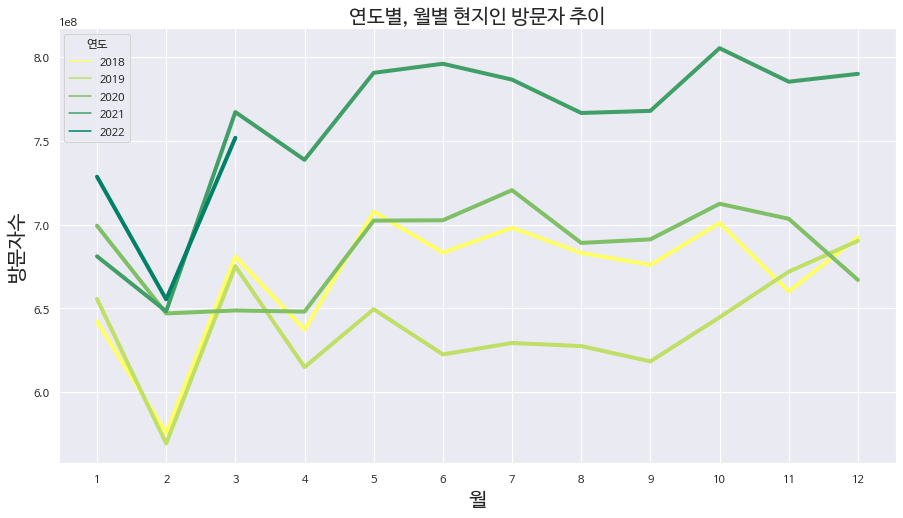

In [ ]:
plt.figure(figsize=(15, 8)) 
plt.rc('font', family='NanumBarunGothic')
plt.title("연도별, 월별 현지인 방문자 추이", fontsize=20)
plt.xlabel("월", fontsize=20)
plt.ylabel("방문자수", fontsize=20)
ax = plt.subplot()
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

sns.lineplot(data=visitor_sum, x = '월', y = '방문자수', hue = '연도', lw=4, palette='summer_r')